# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.1

In [3]:
airbnb_df = pd.read_csv("airbnb_hw.csv") #loaded the data with Pandas
airbnb_df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


2.2

In [7]:
print(airbnb_df.shape) #dimensions of the data #(30478, 13)

number_of_observations = airbnb_df.shape[0]
print(number_of_observations) #number of observations #30478

print(airbnb_df.columns) #included variables #Host Id, Host Since, Name, Neighborhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, NUmber of Records, Number of Reviews, Price, Review Scores Rating

airbnb_df.head() #first few rows of data

(30478, 13)
30478
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


2.3

I've noticed that apartments are the most common property type. Specifically, entire apartments are more available than any other kind of property. Some of the least common properties (below 10) include entire areas for boats, bungalows, cabins, campers/RVs, castles, chalets, dorms, huts, lighthouses, tents, treehouses, and villas, private rooms for boats, bungalows, cabins, campers/RVs, castles, chalets, huts, lighthouses, tents, treehouses, and villas, and shared rooms for boats, bungalows, cabins, campers/RVs, castles, chalets, condominiums, huts, lighthouses, other property types, tents, townhouses, treehouses, and villas. Many of the mentioned properties are also not available.

For properties where private rooms are more commonly rented, these include, bed and breakfasts, dorms, houses, other property types, and tents.

In [8]:
pd.crosstab(airbnb_df["Room Type"], airbnb_df["Property Type"]) #cross tab of Room Type and Property Type

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


2.4

The pre-transformation data from the histogram, the kernel density plot, the boxplot, and the statistical description seem to be badly skewed. Especially in the histogram, it's hard to tell how many data points are in each bin, especially as we move along the x-axis. Similarly, with the density plot, it is hard to tell how many data points are there as we go along the x-axis. The boxplot also shows a significant number of outliers.

<Axes: >

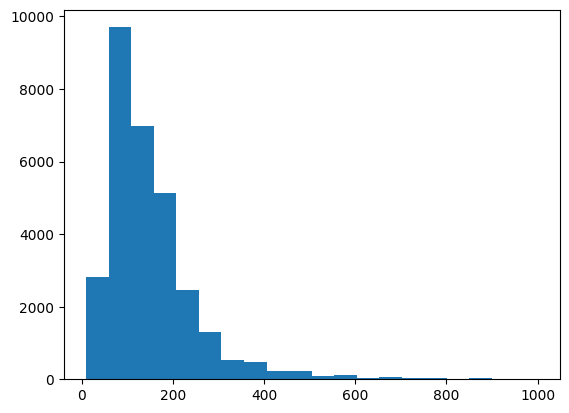

In [19]:
airbnb_df["Price"].hist(bins=20, grid=False) #histogram (pre-transformation)

<Axes: ylabel='Density'>

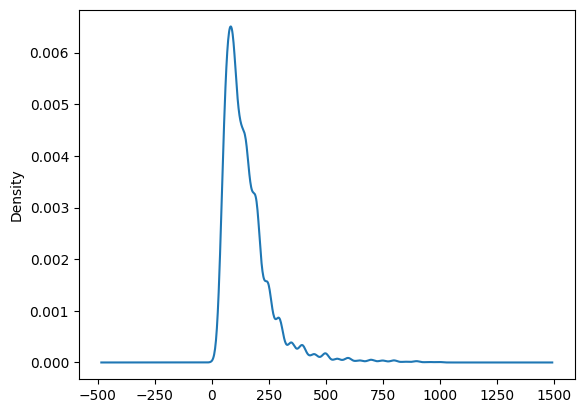

In [20]:
var = "Price"
airbnb_df[var].plot.density() #kernel density plot

<Axes: >

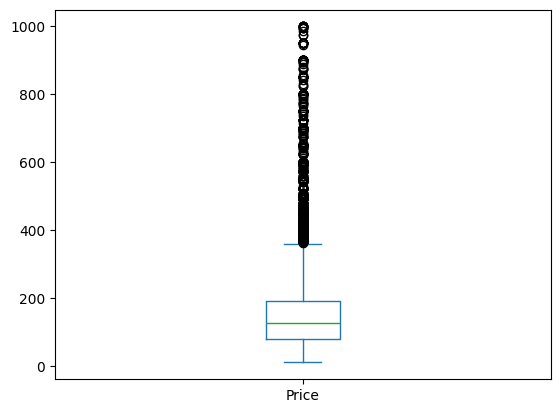

In [21]:
airbnb_df["Price"].plot.box() #box plot

In [22]:
descr = airbnb_df["Price"].describe() #Describe price and save as an object
print(descr, '\n')

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 



In [23]:
std = descr["std"] #computing variance
var = std**2
print("Variance: ", var, '\n')

Variance:  11858.27313785064 



In [25]:
#Computing IQR
thirdQ = descr["75%"] #75% percentile
firstQ = descr["25%"] #25% percentile
IQR = thirdQ - firstQ #IQR
print("IQR: ", IQR)

IQR:  112.0


<Axes: >

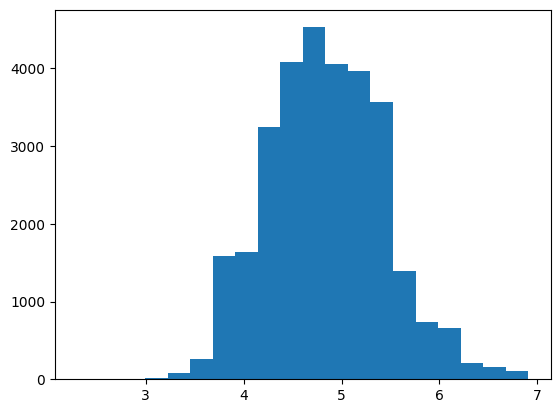

In [32]:
airbnb_df["price_log"] = np.log(airbnb_df["Price"]) #log transformation of price

airbnb_df.loc[airbnb_df["price_log"]>0, "price_log"].hist(bins=20, grid=False) #histogram (post-transformation)

<Axes: ylabel='Density'>

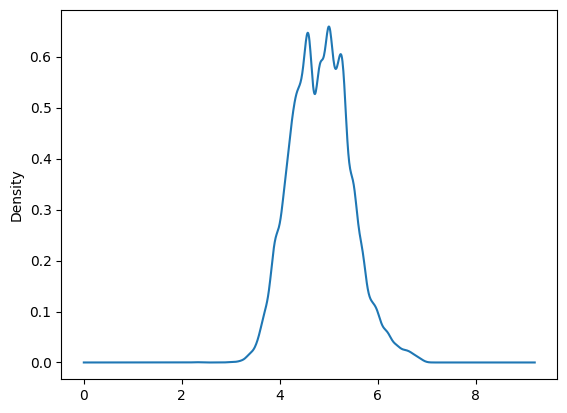

In [33]:
var = "price_log"
airbnb_df[var].plot.density() #kernel_density plot post-transformation

<Axes: >

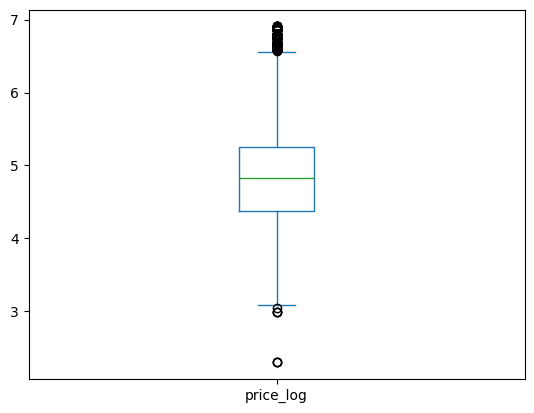

In [34]:
airbnb_df["price_log"].plot.box() #box plot post-transformation

In [35]:
descr = airbnb_df["price_log"].describe() #Describe price_log and save as an object
print(descr, '\n')

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64 



In [30]:
std = descr["std"] #computing variance of price_log
var = std**2
print("Variance: ", var, '\n')

Variance:  0.3564079204065675 



In [31]:
#Computing IQR of price_log
thirdQ = descr["75%"] #75% percentile of price_log
firstQ = descr["25%"] #25% percentile of price_log
IQR = thirdQ - firstQ #IQR of price_log
print("IQR: ", IQR)

IQR:  0.8754687373539003


2.5

<Axes: xlabel='price_log', ylabel='Beds'>

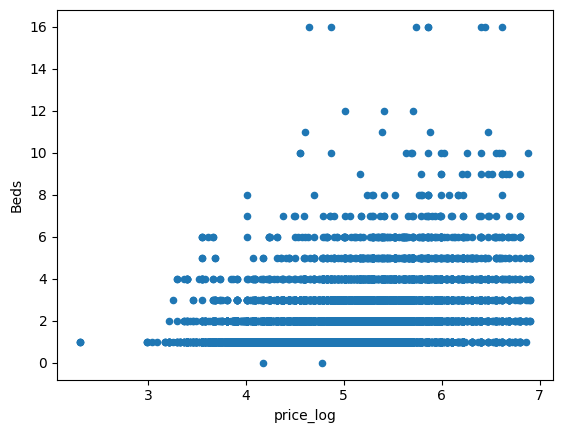

In [36]:
airbnb_df.plot.scatter(x="price_log", y="Beds") #scatterplot of price_log and Beds

#I see more dots clustering towards the higher end of the price_log axis and the lower end of the Beds axis. I see a few data points towards the top, but I mainly see rows of clustered data points towards the bottom right of the scatterplot.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.